A few of the data Sources:

http://planningcommission.gov.in/data/datatable/index.php?data=datatab

http://data.gov.in

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.DataFrame(pd.read_csv('india_rural.txt',sep='\t',skiprows=(0),header=(0),low_memory=False))

In [ ]:
# as a % of state population and gdp values
rural_pop = 0.65
rural_gdp = 0.3

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10249 entries, 0 to 10248
Columns: 483 entries, household_id to elec_appl
dtypes: float64(295), int64(58), object(130)
memory usage: 37.8+ MB


In [91]:
df.fillna(0)

,household_id,date,state_code,state,district_code,district,village_code,village,hamlet,survey_taken,decisionmakerYN,gender,age,married,adults,adult_females,a_working_females,children,a_children_male,b_children_abv14,ppl_studying,edu,ration_card,income_source,income_source_other,bankac,hh_expenses,annual_income,hh_indebted,a_hh_debt,decisionmakers,land_ownership,a_land_owned,a_land_units,house_owned,house_type,a_room,b_bicycle,c_motorcycle,d_tractor_car,e_toilets,cooking_fuels_1,cooking_fuels_2,cooking_fuels_3,cooking_fuels_others,a_cow.buffalo,b_fowls_chickens,c_goats,business_interests,a_business_barriers,a_business_barriers_1,a_business_barriers_2,a_business_barriers_3,a_business_barriers_others,grid_use,a_grid_hamlet,b_no_grid_reason1,b_no_grid_reason2,b_no_grid_reason3,b_no_grid_reason4,b_no_grid_reason_others,c_dist_pole,grid_years,grid_months,grid_initial_cost,grid_meter,grid_bill_freq,grid_bill_freq_other,a_grid_bill_type,grid_bill_avail,a_grid_bill_MMYY,b_grid_bill_days,c_grid_bill_amt1,d_grid_bill_units,grid_bill_amt2,grid_hours,grid_hours_eve,grid_nopower,grid_app_damage,grid_vol_low,shs_heard,shs_use,shs_brand,shs_years,shs_months,shs_watt,shs_cost,shs_hours,battery_use,battery_brand_L,battery_ah,battery_cost,battery_charge_mode,battery_charge_mode1,battery_charge_freq,battery_charge_cost,battery_hours,mgrid_heard,a_mgrid_heard_source1,a_mgrid_heard_source2,a_mgrid_heard_source3,a_mgrid_heard_source4,mgrid_use,a_mgrid_hamlet,b_mgrid_use_before,c_mgrid_reason_no_use1,mgrid_years,mgrid_months,mgrid_initial_cost,mgrid_meter,mgrid_bill_type,mgrid_bill_avail,mgrid_hours,dg_use,dg_hours,dg_per1_connec2,dg_connec2_expense,dg_per1_cost,dg_per1_diesel_amt,dg_per1_disel_price,dg_per1_disel_dist,dg_per1_disel_repaircost,elec_primary_source,elec_satisfied_,kero_use_,a_kero_noreason,a_kero_noreason1,a_kero_noreason2,a_kero_noreason3,a_kero_noreason4,a_kero_noreasonother,kero_purpose,kero_purpose1,kero_purpose2,kero_purpose3,kero_pds_ltr,kero_pds_price,kero_market_YN,a_kero_marketltr,b_kero_marketprice,kero_wicks,kero_lanterns,kero_hours_total,kero_nonlightuse_ltr,kero_harmful,sl_heard,sl_use,a_sl_years,b_sl_months,sl_number,sl_cost_total,a_sl_hours_home,b_sl_hours_outside,light_othersources,light_othersources1,light_othersources4,light_othersources_hours,light_othersources_expenses,light_primary_source,light_primary_sourceother,a_light_satisfied,a_light_unsatisfied_reason,a_light_unsatisfied_reason1,a_light_unsatisfied_reason2,a_light_unsatisfied_reason3,a_light_unsatisfied_reason4,appl_used,appl_used1,appl_used2,appl_used3,appl_used4,appl_used5,appl_used6,appl_used7,appl_used8,appl_used9,appl_used10,appl_used11,appl_used12,appl_used13,appl_used14,A_a_num_Incadesbulb,A_b_watt_Incadesbulb,A_c_brand_Incadesbulb,A_d_tod_Incadesbulb,A_d_tod1_Incadesbulb,A_d_tod2_Incadesbulb,A_d_tod3_Incadesbulb,A_d_tod4_Incadesbulb,A_e_hrs_Incadesbulb,A_e_min_Incadesbulb,B_a_num_CFL,B_b_watt_CFL,B_c_brand_CFL,B_d_tod_CFL,B_d_tod1_CFL,B_d_tod2_CFL,B_d_tod3_CFL,B_e_hrs_CFL,B_e_min_CFL,C_a_num_LED,C_b_watt_LED,C_c_brand_LED,C_d_tod_LED,C_d_tod1_LED,C_d_tod2_LED,C_d_tod3_LED,C_d_tod4_LED,C_e_hrs_LED,C_e_min_LED,D_a_num_tubelight,D_b_watt_tubelight,D_c_brand_tubelight,D_d_tod_tubelight,D_d_tod1_tubelight,D_d_tod2_tubelight,D_e_hrs_tubelight,D_e_min_tubelight,E_a_num_mobile,F_a_num_ceilingfan,F_b_watt_ceilingfan,F_c_brand_ceilingfan,F_c_brand_ceilingfan_2,F_d_tod_ceilingfan,F_d_tod1_ceilingfan,F_d_tod2_ceilingfan,F_d_tod3_ceilingfan,F_d_tod4_ceilingfan,F_e_hrs_ceilingfan,F_e_min_ceilingfan,G_a_num_tablefan,G_b_watt_tablefan,G_c_brand_tablefan,G_d_tod_tablefan,G_d_tod1_tablefan,G_d_tod2_tablefan,G_d_tod3_tablefan,G_d_tod4_tablefan,G_e_hrs_tablefan,G_e_min_tablefan,H_a_num_tv,H_b_inch_tv,H_c_brand_tv,H_c_brand_tv_2,H_d_tod_tv,H_d_tod1_tv,H_d_tod2_tv,H_d_tod3_tv,H_d_tod4_tv,H_e_hrs_tv,H_e_min_tv,I_a_num_cooler,I_b_watt_cooler,I_c_brand_cooler,I_d_tod_cooler,I_d_tod1_cooler,I_d_tod2_cooler,I_d_tod3_cooler,I_d_tod4_cooler,I_e_hrs_cooler,I_e_min_cooler,J_a_num_

In [35]:
df.head()

,household_id,q002_supervisor,q000_interviewer_id,q001_interviewer,q003_date,q004_time,q006_state_code,q007_state,q008_district_code,q009_district,q010_block,q011_village_code,q012_village,q013_hamlet,q101_survey_taken,q101_survey_none_reason,q102_decisionmakerYN,q201_gender,q202_age,q203_married,q204_adults,q205_adult_females,q205_a_working_females,q206_children,q206_a_children_male,q206_b_children_abv14,q207_ppl_studying,q208_edu,q209_religion,q209_religion_other,q210_caste,q210_caste_other,q211_ration_card,q212_income_source,q212_income_source_other,q213_bankac,q214_hh_expenses,q215_annual_income,q215_hh_indebted,q216_a_hh_debt,q217_decisionmakers,q217_decisionmakers_others,q218_land_ownership,q218_a_land_owned,q218_a_land_units,q219_house_owned,q220_house_type,q221_a_room,q221_b_bicycle,q221_c_motorcycle,q221_d_tractor_car,q221_e_toilets,q222_cooking_fuels_1,q222_cooking_fuels_2,q222_cooking_fuels_3,q222_cooking_fuels_4,q222_cooking_fuels_others,q223_a_cow.buffalo,q223_b_fowls_chickens,q223_c_goats,q224_business_interests,q224_a_business_barriers,q224_a_business_barriers_1,q224_a_business_barriers_2,q224_a_business_barriers_3,q224_a_business_barriers_4,q224_a_business_barriers_others,q301_grid_use,q301_a_grid_hamlet,q301_b_no_grid_reason1,q301_b_no_grid_reason2,q301_b_no_grid_reason3,q301_b_no_grid_reason4,q301_b_no_grid_reason5,q301_b_no_grid_reason6,q301_b_no_grid_reason7,q301_b_no_grid_reason_others,q301_c_dist_pole,q302_grid_years,q302_grid_months,q303_grid_initial_cost,q304_grid_meter,q305_grid_bill_freq,q305_grid_bill_freq_other,q305_a_grid_bill_type,q306_grid_bill_avail,q306_a_grid_bill_MMYY,q306_b_grid_bill_days,q306_c_grid_bill_amt1,q306_d_grid_bill_units,q307_grid_bill_amt2,q308_grid_hours,q309_grid_hours_eve,q310_grid_nopower,q311_grid_app_damage,q312_grid_vol_low,q316_shs_heard,q317_shs_use,q318_shs_brand,q319_shs_years,q319_shs_months,q320_shs_watt,q321_shs_cost,q322_shs_hours,q324_battery_use,q325_battery_brand_L,q326_battery_ah,q327_battery_cost,q328_battery_charge_mode,q328_battery_charge_mode1,q328_battery_charge_mode2,q328_battery_charge_mode3,q328_battery_charge_mode_others,q329_battery_charge_freq,q330_battery_charge_cost,q331_battery_hours,q334_mgrid_heard,q334_a_mgrid_heard_source1,q334_a_mgrid_heard_source2,q334_a_mgrid_heard_source3,q334_a_mgrid_heard_source4,q334_a_mgrid_heard_source5,q334_a_mgrid_heard_source6,q334_a_mgrid_heard_source7,q334_a_mgrid_heard_source8,q334_a_mgrid_heard_sourceother,q335_mgrid_use,q335_a_mgrid_hamlet,q335_b_mgrid_use_before,q335_c_mgrid_reason_no_use1,q335_c_mgrid_reason_no_use2,q335_c_mgrid_reason_no_use3,q335_c_mgrid_reason_no_use4,q335_c_mgrid_reason_no_use5,q335_c_mgrid_reason_no_useother,q336_mgrid_years,q336_mgrid_months,q337_mgrid_initial_cost,q338_mgrid_meter,q339_mgrid_bill_type,q340_mgrid_bill_avail,q340_a_mgrid_bill_MMYY,q340_b_mgrid_bill_days,q340_c_mgrid_bill_amt1,q340_d_mgrid_bill_units,q340_e_mgrid_bill_amt2,q341_mgrid_hours,q345_dg_use,q346_dg_hours,q347_dg_per1_connec2,q347_dg_connec2_expense,q347_dg_per1_cost,q348_dg_per1_diesel_amt,q349_dg_per1_disel_price,q350_dg_per1_disel_dist,q351_dg_per1_disel_repaircost,q352_elec_primary_source,q353_elec_satisfied_,q401_kero_use_,q401_a_kero_noreason,q401_a_kero_noreason1,q401_a_kero_noreason2,q401_a_kero_noreason3,q401_a_kero_noreason4,q401_a_kero_noreason5,q401_a_kero_noreason6,q401_a_kero_noreasonother,q402_kero_purpose,q402_kero_purpose1,q402_kero_purpose2,q402_kero_purpose3,q402_kero_purpose4,q402_kero_purposeother,q403_kero_pds_ltr,q404_kero_pds_price,q405_kero_market_YN,q405_a_kero_marketltr,q405_b_kero_marketprice,q406_kero_wicks,q407_kero_lanterns,q408_kero_hours_total,q409_kero_nonlightuse_ltr,q410_kero_harmful,q411_sl_heard,q412_sl_use,q413_a_sl_years,q413_b_sl_months,q414_sl_number,q415_sl_cost_total,q416_a_sl_hours_home,q416_b_sl_hours_outside,q417_light_othersources,q417_light_othersources1,q417_light_othersources2,q417_light_othersources3,q417_light_othersources4,q418_light_othersources_hours,q419

In [5]:
cols = df.columns.tolist()

In [6]:
len(cols)

561

In [7]:
no_value_cols = df.columns[(df.isnull()).all()]

In [8]:
len(no_value_cols)

71

In [9]:
df.drop(df[no_value_cols],axis=1,inplace=True)

In [10]:
len(df.columns)

490

In [133]:
cols_to_drop =['q002_supervisor','q000_interviewer_id','q001_interviewer','q004_time','q010_block','q209_religion',
               'q210_caste','q210_caste_other']

In [134]:
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [138]:
df.columns = new_col_names

In [41]:
cooking_fuels = ['cooking_fuels_1', 'cooking_fuels_2', 'cooking_fuels_3','cooking_fuels_others']

In [139]:
df_grid_use = pd.DataFrame(df[['state','grid_use','grid_hours','mgrid_use']])

In [145]:
df_grid_use.drop(columns='mgrid_use',axis=1,inplace=True)

In [146]:
# no. of hours of power for those connected to grid
hours_grid = df_grid_use[df_grid_use['grid_use'] == 1]

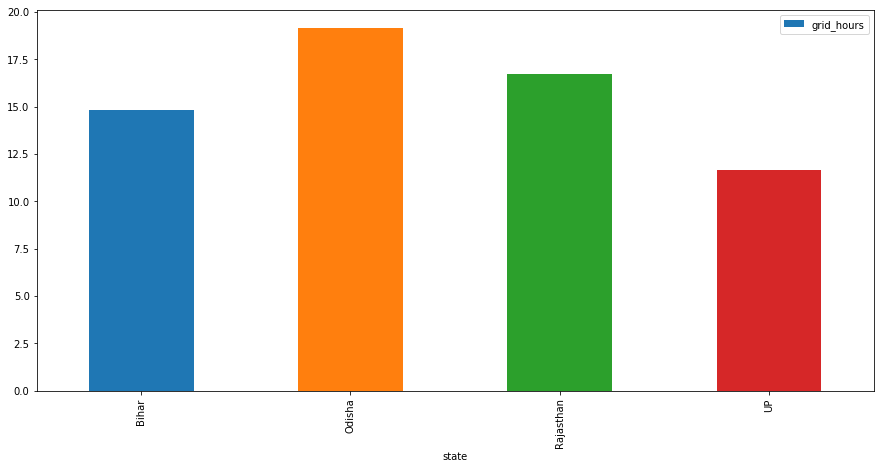

In [168]:
# Avg. no. of hours of electricity per day through grid
fig2, ax2 = plt.subplots(figsize=(15,7))

hours_grid.groupby('state')['grid_hours'].mean().plot(kind='bar',ax=ax2)
ax2.legend(loc='upper right')

In [157]:
demand_variables =['hh_expenses','income_source','grid_initial_cost',
                  'grid_bill_amt2','annual_income', 'appl_used1','appl_want1','edu']


In [63]:
#df['elec_appl'] = df['H_a_num_tv'] + df['I_a_num_cooler'] + df['J_a_num_elec_stove'] + df['K_a_num_comp_laptop'] + df['L_a_num_fridge'] + df['N_a_num_grinder']+ df['S_a_num_water_pump']

In [72]:
df['elec_appl'].value_counts()

10.00    1
Name: elec_appl, dtype: int64

In [150]:
primary_features = ['household_id','state','gender','age','adults','children','edu','hh_expenses','annual_income','hh_indebted',
                   'business_interests','grid_use','grid_initial_cost','d_grid_bill_units','c_grid_bill_amt1','grid_bill_amt2',
                    'grid_hours','grid_nopower','mgrid_use','mgrid_initial_cost']

In [ ]:
#appl = ['H_a_num_tv','I_a_num_cooler',
 #                   'J_a_num_elec_stove','K_a_num_comp_laptop','L_a_num_fridge','N_a_num_grinder','S_a_num_water_pump']

In [151]:
df_primary = pd.DataFrame(df[primary_features])

In [152]:
df_primary =  df_primary.loc[:,~df_primary.columns.duplicated()]

In [153]:
df_primary.fillna(0,inplace=True)

In [114]:
#df_primary['elec_appl_num']= df['H_a_num_tv'] + df['I_a_num_cooler'] + df['J_a_num_elec_stove'] + df_primary['K_a_num_comp_laptop'] + df_primary['L_a_num_fridge'] + df_primary['N_a_num_grinder']+ df_primary['S_a_num_water_pump']

In [120]:
#df_primary.drop(columns=['H_a_num_tv','I_a_num_cooler','J_a_num_elec_stove','K_a_num_comp_laptop',
 #                        'L_a_num_fridge','N_a_num_grinder','S_a_num_water_pump','elec_appl_num'],inplace=True)

In [154]:
df_primary.head()

,household_id,state,gender,age,adults,children,edu,hh_expenses,annual_income,hh_indebted,business_interests,grid_use,grid_initial_cost,d_grid_bill_units,c_grid_bill_amt1,grid_bill_amt2,grid_hours,grid_nopower,mgrid_use,mgrid_initial_cost
0,104889,Rajasthan,0,30,5,7,2,15000.00,100000.00,1,1,1,700.00,73.00,710.00,0.00,22.00,0.00,0,0
1,104915,Rajasthan,0,61,3,0,6,7000.00,120000.00,0,1,1,0.00,0.00,0.00,500.00,23.00,0.00,0,0
2,104996,Rajasthan,0,45,3,3,2,5000.00,100000.00,0,1,1,21.00,0.00,0.00,1500.00,24.00,0.00,0,0
3,105012,Rajasthan,0,40,2,3,3,5000.00,60000.00,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,104994,Rajasthan,0,40,4,1,2,5000.00,90000.00,1,1,1,0.00,0.00,0.00,500.00,20.00,0.00,0,0


In [155]:
df_primary['grid_bill_avg'] = (df_primary['c_grid_bill_amt1'] + df_primary['grid_bill_amt2'])/2

In [159]:
df_primary = df_primary[df_primary.grid_bill_avg < 10000]

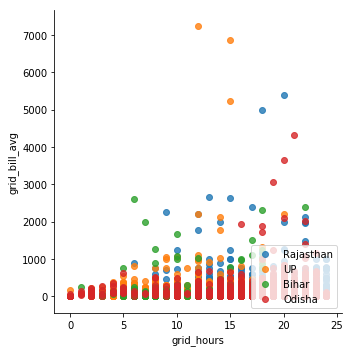

In [160]:
import seaborn as sns
sns.lmplot( x='grid_hours', y="grid_bill_avg", data=df_primary, fit_reg=False, hue='state', legend=False)
plt.legend(loc='lower right')


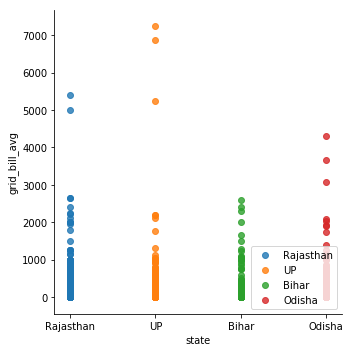

In [181]:
sns.lmplot( y='grid_bill_avg', x="state", data=df_primary, fit_reg=False, hue='state', legend=False)
plt.legend(loc='lower right')


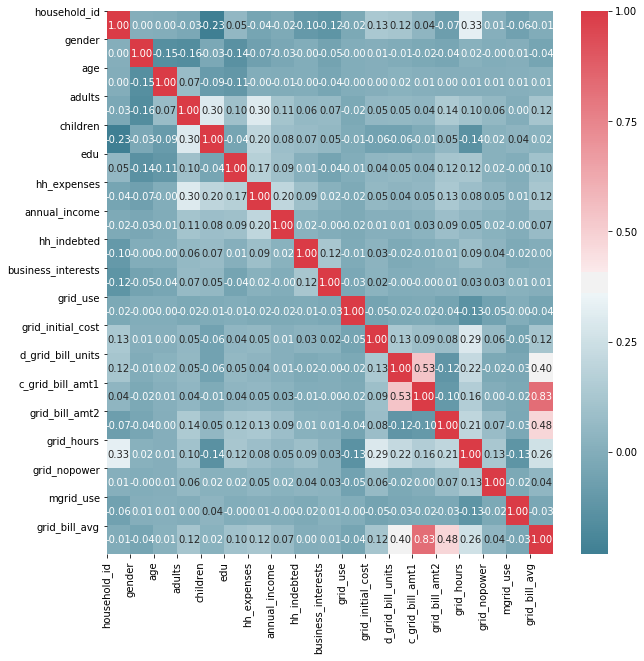

In [185]:
corr = df_primary.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [178]:
# get the capacity data

df_capacity = pd.DataFrame(pd.read_csv('statewise installed capacity NEW.csv'))

In [179]:
df_capacity.head()

,Unnamed: 0,Installed Capacity-State Sector & UT's (in MW) - 2000-01 to 2010-11,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,2000-01 2001-02 2002-03 2003-04 2004-05 2005-0...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,2010-11,nan
1,No.,SEB/Organisation Actual Actual Actual Actual A...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Actual,nan
2,State Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan
3,1 Andhra Pradesh,"5,876","6,179","6,479","6,639","6,640","6,939","7,090",7334.70,7097.9,7688.0,8481.90
4,2 Arunachal Pradesh,45,45,46,34,34,60,69,61.10,61.1,83.0,94.70


In [ ]:
pos = [0,1,2]
df_capacity.drop(df_capacity.index[pos], inplace=True)